# Chunking 分块
视频链接：https://www.youtube.com/watch?v=8OJC21T2SL4  
分块可视化：https://chunkviz.up.railway.app/  
多级分块策略：  
- 代码库：https://github.com/FullStackRetrieval-com/RetrievalTutorials
- 网站教程：https://community.fullstackretrieval.com/document-loaders/text-splitting


## Level 1: Character Splitting 字符分割

In [1]:
# 测试文本
text = "This is the text I would like to chunk up. It is the example text for this exercise"

In [2]:
chunks = []

# 每个chunk包含的字符数
chunk_size = 35

# 根据chunk_size进行划分
for i in range(0, len(text), chunk_size):
    chunk = text[i:i + chunk_size]
    chunks.append(chunk)
for doc in chunks:
    print(f"len = {len(doc)}, content = '{doc}'")

len = 35, content = 'This is the text I would like to ch'
len = 35, content = 'unk up. It is the example text for '
len = 13, content = 'this exercise'


In [3]:
# 基于langchain来实现字符划分
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=35,
    chunk_overlap=0,
    separator='',
    strip_whitespace=False,
)

split_docs = text_splitter.create_documents([text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 35, content = 'This is the text I would like to ch'
len = 35, content = 'unk up. It is the example text for '
len = 13, content = 'this exercise'


In [4]:
# 增加重叠字符的字符划分
text_splitter = CharacterTextSplitter(
    chunk_size=35,
    chunk_overlap=4,  # diff
    separator='',
    strip_whitespace=False,
)

split_docs = text_splitter.create_documents([text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 35, content = 'This is the text I would like to ch'
len = 35, content = 'o chunk up. It is the example text '
len = 21, content = 'ext for this exercise'


In [5]:
# 使用其它字符进行分割
text_splitter = CharacterTextSplitter(
    chunk_size=35,
    chunk_overlap=0,
    separator='ch',  # diff
    strip_whitespace=False,
)

split_docs = text_splitter.create_documents([text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 33, content = 'This is the text I would like to '
len = 48, content = 'unk up. It is the example text for this exercise'


## Level 2: Recursive Character Text Splitting 递归字符文本分割

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = """
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.

Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.

It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. [1]
"""

In [7]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=65,
    chunk_overlap=0
)
split_docs = text_splitter.create_documents([text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 62, content = 'One of the most important things I didn't understand about the'
len = 63, content = 'world when I was a child is the degree to which the returns for'
len = 28, content = 'performance are superlinear.'
len = 64, content = 'Teachers and coaches implicitly told us the returns were linear.'
len = 64, content = '"You get out," I heard a thousand times, "what you put in." They'
len = 60, content = 'meant well, but this is rarely true. If your product is only'
len = 61, content = 'half as good as your competitor's, you don't get half as many'
len = 60, content = 'customers. You get no customers, and you go out of business.'
len = 56, content = 'It's obviously true that the returns for performance are'
len = 53, content = 'superlinear in business. Some think this is a flaw of'
len = 64, content = 'capitalism, and that if we changed the rules it would stop being'
len = 62, content = 'true. But superlinear returns for performance are a feature of'
len = 62, content = 'the wo

In [8]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0
)
split_docs = text_splitter.create_documents([text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 155, content = 'One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.'
len = 313, content = 'Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.'
len = 433, content = 'It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. [1]'


## Level 3: Document Specific Splitting 针对特定类型文档的分割

### markdwon

In [9]:
from langchain.text_splitter import MarkdownTextSplitter

markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""

In [10]:
splitter = MarkdownTextSplitter(
    chunk_size=40,
    chunk_overlap=0
)
split_docs = splitter.create_documents([markdown_text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 31, content = '# Fun in California

## Driving'
len = 38, content = 'Try driving on the 1 down to San Diego'
len = 8, content = '### Food'
len = 39, content = 'Make sure to eat a burrito while you're'
len = 5, content = 'there'
len = 25, content = '## Hiking

Go to Yosemite'


### python

In [11]:
from langchain.text_splitter import PythonCodeTextSplitter

python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""

In [12]:
splitter = PythonCodeTextSplitter(
    chunk_size=100,
    chunk_overlap=0
)
split_docs = splitter.create_documents([python_text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 86, content = 'class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age'
len = 58, content = 'p1 = Person("John", 36)

for i in range(10):
    print (i)'


### JS

In [13]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""

In [14]:
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS,
    chunk_size=65,
    chunk_overlap=0
)
split_docs = js_splitter.create_documents([javascript_text])
for doc in split_docs:
    print(f"len = {len(doc.page_content)}, content = '{doc.page_content}'")

len = 56, content = '// Function is called, the return value will end up in x'
len = 25, content = 'let x = myFunction(4, 3);'
len = 27, content = 'function myFunction(a, b) {'
len = 60, content = '// Function returns the product of a and b
  return a * b;
}'


### 带表格的PDF文件

In [1]:
import os

# 设置 HuggingFace 镜像源
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
print(f"当前 HF_ENDPOINT: {os.getenv('HF_ENDPOINT', '未设置（使用默认）')}")

当前 HF_ENDPOINT: https://hf-mirror.com


In [2]:
import os
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json

/Users/young/project/llmProject/rag-from-scratch/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [9]:
filename = "static/SalesforceFinancial.pdf"

elements = partition_pdf(
    filename=filename,
    strategy="hi_res",
    infer_table_structure=True,
    model_name="yolox"
)
elements

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [13]:
elements[-5].metadata.text_as_html

'<table><thead><tr><th>Revenue")</th><th>Guidance $7.69 - $7.70 Billion</th><th>Guidance $31.7 - $31.8 Billion</th></tr></thead><tbody><tr><td>Y/Y Growth</td><td>~21%</td><td>~20%</td></tr><tr><td>FX Impact?)</td><td>~($200M) y/y FX</td><td>~($600M) y/y FX)</td></tr><tr><td>GAAP operating margin</td><td>N/A</td><td>~3.8%</td></tr><tr><td>Non-GAAP operating margin”)</td><td>N/A</td><td>~20.4%</td></tr><tr><td>GAAP earnings (loss) per share</td><td>($0.03) - ($0.02)</td><td>$0.38 - $0.40</td></tr><tr><td>Non-GAAP earnings per share</td><td>$1.01 - $1.02</td><td>$4.74 - $4.76</td></tr><tr><td>Operating Cash Flow Growth (Y/Y)</td><td>N/A</td><td>~21% - 22%</td></tr><tr><td>Current Remaining Performance Obligation Growth (Y/Y)</td><td>~15%</td><td>N/A</td></tr></tbody></table>'

In [15]:
with open("static/pdf_table_to_html.html", 'w') as f:
    f.write(elements[-5].metadata.text_as_html)

### 多模态（文本 + 图像）

In [16]:
from typing import Any

from pydantic import BaseModel
from unstructured.partition.pdf import partition_pdf

In [17]:
filepath = "./static/VisualInstruction.pdf"

raw_pdf_elements = partition_pdf(
    filename=filepath,

    # 使用pdf模式，寻找内嵌的图片
    extract_images_in_pdf=True,

    # 使用视觉模型(YOLOX)识别layout，获取表格的边界(bounding boxes)和标题
    infer_table_structure=True,

    # 按标题分块
    chunk_strategy="by_title",

    # 每个文本块的最大字符数限制
    max_characters=4000,
    # 在达到多少字符后开始新块(不是强制开始新块，而是尝试开始)
    new_after_n_chars=3800,
    # 尝试合并少于多少字符的文本块
    combine_text_under_n_chars=2000,
    image_output_dir_path="static/pdfImages/"
)

#### 处理分块后的图片--使用多模态大模型


In [18]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage
import os
from dotenv import load_dotenv
from PIL import Image
import base64
import io

load_dotenv()

True

In [19]:
def image_to_base64(image_path):
    with Image.open(image_path) as image:
        buffered = io.BytesIO()
        image.save(buffered, format=image.format)
        img_str = base64.b64encode(buffered.getvalue())
        return img_str.decode("utf-8")

image_str = image_to_base64("./static/pdfImages/figure-15-6.jpg")

In [20]:
llm = ChatOpenAI(
    model=os.getenv("ARK_VLM_MODEL"),
    base_url=os.getenv("ARK_API_URL"),
    api_key=os.getenv("ARK_API_KEY"),
)

/var/folders/7r/h44tfn_x35jg4s7msmb1gdzw0000gp/T/ipykernel_23561/872777202.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [24]:
# 使用多模态llm，生成图片的描述
msg = llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "请用中文对所提供的图片进行概述。"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_str}"
                    }
                }
            ]
        )
    ]
)
print(msg.content)

这张图片由文字和图像两部分构成，整体呈现出幽默反差的效果：  
上方文字写道“有时我看着从太空拍摄的地球照片，惊叹于它的美丽”，表达对地球美景的赞叹；  
下方图像则展示了烤盘上的炸鸡块被摆成地球大陆的形状，仿佛一幅“炸鸡版地球地图”。  

文字对地球美景的抒情与图像中用炸鸡模拟地球的搞笑创意形成鲜明对比，以戏谑的方式将“地球”与日常食物结合，营造出轻松有趣的氛围。


## Level 4: Semantic Splitting 语义分割

In [25]:
# 加载文本
with open("data/PGEssays/mit.txt") as file:
    essay = file.read()

In [26]:
# 按句子进行划分
import re

# 使用 ".?!" 作为分隔符
# (?<=...) 是后顾断言语法, 表示匹配位置必须紧跟在".?!"之后
single_sentence_list = re.split(r"(?<=[.?!])\s+", essay)
print(f"{len(single_sentence_list)} sentences were found")

317 sentences were found


In [27]:
# 按顺序存储句子
sentences = [
    {"sentence": x, "index": i} 
    for i, x in enumerate(single_sentence_list)
]
sentences[:3]

[{'sentence': '\n\nWant to start a startup?', 'index': 0},
 {'sentence': 'Get funded by\nY Combinator.', 'index': 1},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2}]

In [29]:
# 将句子按滑动窗口法进行分块
# 滑窗设置[i - buffer_size, i + buffer_size]
def combine_sentences(sentences, buffer_size=1):
    for i in range(len(sentences)):
        combined_sentence = ""
        # 滑窗设置[i - buffer_size, i + buffer_size]
        for j in range(i - buffer_size, i):
            if j >= 0:
                combined_sentence += sentences[j]["sentence"] + " "
        combined_sentence += sentences[i]["sentence"]
        for j in range(i + 1, i + 1 + buffer_size):
            if j < len(sentences):
                combined_sentence += " " + sentences[j]["sentence"]
        # 并合并后的句子，添加在dict中
        sentences[i]["combined_sentence"] = combined_sentence
    return sentences

sentences = combine_sentences(sentences)
sentences[:3]


[{'sentence': '\n\nWant to start a startup?',
  'index': 0,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator.'},
 {'sentence': 'Get funded by\nY Combinator.',
  'index': 1,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.'},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2,
  'combined_sentence': 'Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school. I think there will increasingly be a third option:\nto start your own startup.'}]

In [38]:
# 向量化
import os
from ark_embedding import ArkEmbeddings

embd = ArkEmbeddings(
    model=os.getenv("ALIYUN_EMBEDDING_MODEL"),
    api_key=os.getenv("ALIYUN_API_KEY"),
    api_url=os.getenv("ALIYUN_API_URL"),
    batch_size=10
)

embeddings = embd.embed_documents([x["combined_sentence"] for x in sentences])

for i, sentence in enumerate(sentences):
    sentence["combined_sentence_embedding"] = embeddings[i]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算相似度
def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]["combined_sentence_embedding"]
        embedding_next = sentences[i + 1]["combined_sentence_embedding"]

        # 计算余弦相似度
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        distance = 1 - similarity
        distances.append(distance)
        sentences[i]["distance_to_next"] = distance
    
    return distances, sentences

distances, sentences = calculate_cosine_distances(sentences)
distances[:3]


[np.float64(0.3714691874517916),
 np.float64(0.057752718342825915),
 np.float64(0.16967400143698297)]

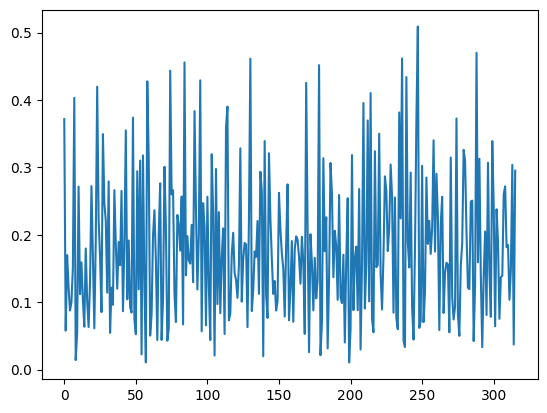

In [40]:
# 可视化
import matplotlib.pyplot as plt

plt.plot(distances)

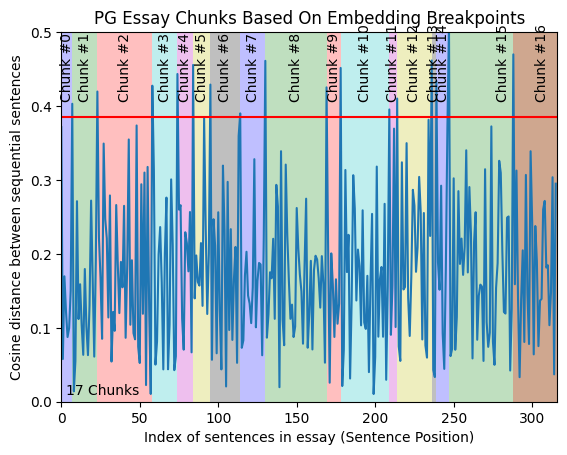

In [43]:
# 根据相似度，搜索分割点
import numpy as np

plt.plot(distances)

y_upper_bound = 0.5
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# distance的使用95分位数
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold)
plt.axhline(y=breakpoint_distance_threshold, color="r", linestyle="-")

# 找到大于95分位数的点
num_distances_above_threshold = len([x for x in distances if x > breakpoint_distance_threshold])
plt.text(x=(len(distances)*0.01), y=y_upper_bound/50, s=f"{num_distances_above_threshold + 1} Chunks")

# 使用95分位数对应的点，进行分割
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold]

# 分片并可视化
colors = ["b", "g", "r", "c", "m", "y", "k"]
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(
        x=np.average([start_index, end_index]),
        y=breakpoint_distance_threshold + y_upper_bound / 20,
        s=f"Chunk #{i}", 
        horizontalalignment="center",
        rotation="vertical"
    )

# 最后一个分片
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(
            last_breakpoint,
            len(distances),
            facecolor=colors[len(indices_above_thresh) % len(colors)],
            alpha=0.25,
        )
        plt.text(
            x=np.average([last_breakpoint, len(distances)]),
            y=breakpoint_distance_threshold + y_upper_bound / 20,
            s=f"Chunk #{i + 1}",
            rotation="vertical"
        )

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [44]:
# 按上述分割点，进行分片
start_index = 0
chunks = []

for index in indices_above_thresh:
    end_index = index

    group = sentences[start_index:end_index + 1]
    combined_text = " ".join([d["sentence"] for d in group])
    chunks.append(combined_text)

    start_index = index + 1

# 处理最后一个分片
if start_index < len(sentences):
    combined_text = " ".join([d["sentence"] for d in sentences[start_index:]])
    chunks.append(combined_text)

In [45]:
# 打印部分结果
for i, chunk in enumerate(chunks[:2]):
    buffer = 200

    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
Want to start a startup? Get funded by
Y Combinator. October 2006(This essay is derived from a talk at MIT.)
Till recently graduating seniors had two choices: get a job or go
to grad school. I think
...
be starting their own
instead of going to work for other people's.The most ambitious students will at this point be asking: Why wait
till you graduate? Why not start a startup while you're in college?


Chunk #1
In fact, why go to college at all? Why not start a startup instead?A year and a half ago I gave a talk 
where I said that the average age of the founders of
Yahoo, Google, and Microsoft was 24, and th
...
]
About a month into each funding
cycle we have an event called Prototype Day where each startup
presents to the others what they've got so far. You might think
they wouldn't need any more motivation.




## Level 5: Agentic Splitting 代理分割

In [54]:
from langchain.output_parsers.openai_tools import JsonOutputToolsParser
from langchain_community.chat_models import ChatOpenAI
from langchain.chat_models import init_chat_model
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain.chains import create_extraction_chain
from typing import Optional, List
from langchain.chains import create_extraction_chain_pydantic
from pydantic import BaseModel
from langchain import hub
from dotenv import load_dotenv

load_dotenv()

True

### 从句子到陈述

In [48]:
# 使用langchian提供的prompt
obj = hub.pull("wfh/proposal-indexing")
obj

ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'wfh', 'lc_hub_repo': 'proposal-indexing', 'lc_hub_commit_hash': 'd962e1728e4cb8a6c7f0aa05522c4102fc8c941c20a6915ff3b7f243cca93943'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of\ncontext.\n1. Split compound sentence into simple sentences. Maintain the original phrasing from the input\nwhenever possible.\n2. For any named entity that is accompanied by additional descriptive information, separate this\ninformation into its own distinct proposition.\n3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences\nand replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the\nentities they refer to.\n4. Present the results as a list of 

In [49]:
# system prompt
print(obj.get_prompts()[0].messages[0].prompt.template)

Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of
context.
1. Split compound sentence into simple sentences. Maintain the original phrasing from the input
whenever possible.
2. For any named entity that is accompanied by additional descriptive information, separate this
information into its own distinct proposition.
3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences
and replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the
entities they refer to.
4. Present the results as a list of strings, formatted in JSON.

Example:

Input: Title: ¯Eostre. Section: Theories and interpretations, Connection to Easter Hares. Content:
The earliest evidence for the Easter Hare (Osterhase) was recorded in south-west Germany in
1678 by the professor of medicine Georg Franck von Franckenau, but it remained unknown in
other parts of Germany until the 18th century. Scholar Richar

In [50]:
# user prompt
print(obj.get_prompts()[0].messages[1].prompt.template)

Decompose the following:
{input}


In [55]:
import os

api_url = os.getenv('API_URL')
api_key = os.getenv('API_KEY')
model_name = os.getenv('MODEL')
model = init_chat_model(
    model_provider="openai",  # 避免langchain根据模型名自动选择供应商
    model=model_name, 
    # temperature=0.0,
    api_key=api_key,
    base_url=api_url,

)

In [56]:
# 定义输出
class Sentences(BaseModel):
    sentences: List[str]

structured_output_model = model.with_structured_output(Sentences)
# 构建处理链
runnable_chain = obj | structured_output_model

In [57]:
with open("./data/PGEssays/superlinear.txt", encoding="utf-8") as f:
    essay = f.read()
paragraphs = essay.split("\n\n")
print(len(paragraphs))

53


In [ ]:
# 进行命题提取
# essay_propositions = []

# 按段落进行提取（只提取前5段）
# for i, para in enumerate(paragraphs[:5]):
#     propositions = runnable_chain.invoke(para)

#     essay_propositions.extend(propositions)
#     print(f"Done with {i}")
essay_propositions_orig = runnable_chain.batch(paragraphs, {"max_concurrency": 10})
print(len(essay_propositions_orig))

53


In [94]:
# 查看提取结果, 可以将原本的句子重构成“独立的陈述”，不需要借助上下文就可以理解含义。
print(f"You have {len(essay_propositions_orig)} propositions")
essay_propositions_orig[:10]

You have 53 propositions


[Sentences(sentences=['The month is October.', 'The year is 2023.']),
 Sentences(sentences=['One of the most important things the speaker did not understand about the world when the speaker was a child is the degree to which the returns for performance are superlinear.']),
 Sentences(sentences=['Teachers and coaches implicitly told us the returns were linear.', 'Teachers and coaches said, "You get out what you put in."', 'The speaker heard the phrase "You get out what you put in" a thousand times.', 'Teachers and coaches meant well.', 'The statement "You get out what you put in" is rarely true.', "If your product is only half as good as your competitor's product, you don't get half as many customers.", "If your product is only half as good as your competitor's product, you get no customers.", "If your product is only half as good as your competitor's product, you go out of business."]),
 Sentences(sentences=['It is obviously true that the returns for performance are superlinear in busi

In [96]:
essay_propositions = [s for p in essay_propositions_orig for s in p.sentences]
essay_propositions[:10]

['The month is October.',
 'The year is 2023.',
 'One of the most important things the speaker did not understand about the world when the speaker was a child is the degree to which the returns for performance are superlinear.',
 'Teachers and coaches implicitly told us the returns were linear.',
 'Teachers and coaches said, "You get out what you put in."',
 'The speaker heard the phrase "You get out what you put in" a thousand times.',
 'Teachers and coaches meant well.',
 'The statement "You get out what you put in" is rarely true.',
 "If your product is only half as good as your competitor's product, you don't get half as many customers.",
 "If your product is only half as good as your competitor's product, you get no customers."]

### Agentic chunk
整体的思路是，将文本分成陈述，对陈述进行chunk，不考虑陈述的顺序，所以整体更像是进行分类。

In [98]:
from agentic_chunker import AgenticChunker

ac = AgenticChunker()

In [100]:
# 添加陈述
ac.add_propositions(essay_propositions[:30])


Adding: 'The month is October.'
Chunk Found (0f82c), adding to: Date & Times

Adding: 'The year is 2023.'
Chunk Found (0f82c), adding to: Date & Times & Changes

Adding: 'One of the most important things the speaker did not understand about the world when the speaker was a child is the degree to which the returns for performance are superlinear.'
Chunk Found (fdf5b), adding to: Superlinear Returns & Mechanisms

Adding: 'Teachers and coaches implicitly told us the returns were linear.'
Chunk Found (701ee), adding to: Thresholds, Compounding & Learning

Adding: 'Teachers and coaches said, "You get out what you put in."'
Chunk Found (701ee), adding to: Exponential Growth & Learning Thresholds

Adding: 'The speaker heard the phrase "You get out what you put in" a thousand times.'
No chunks found
Created new chunk (7f6bf): Common Phrases & Sayings

Adding: 'Teachers and coaches meant well.'
Chunk Found (69f44), adding to: Stories & Anecdotes

Adding: 'The statement "You get out what you pu

In [ ]:
# 打印分块结果
ac.pretty_print_chunks()


You have 14 chunks

Chunk #0
Chunk ID: 0f82c
Summary: This chunk contains information about dates, times, historical changes, and personal development.
Propositions:
    -The month is October.
    -The year is 2023.
    -That situation has changed in the last few centuries.
    -You yourself have grown.
    -The month is October.
    -The year is 2023.



Chunk #1
Chunk ID: fdf5b
Summary: This chunk explores the concept of superlinear returns in performance, their causes (exponential growth and thresholds), and their implications across various domains like business, fame, and learning.
Propositions:
    -One of the most important things the speaker did not understand about the world when the speaker was a child is the degree to which the returns for performance are superlinear.
    -Teachers and coaches implicitly told us the returns were linear.
    -Teachers and coaches said, "You get out what you put in."
    -The speaker heard the phrase "You get out what you put in" a thousand t

In [102]:
# 获取分块
chunks = ac.get_chunks(get_type="list_of_strings")
chunks

['The month is October. The year is 2023. That situation has changed in the last few centuries. You yourself have grown. The month is October. The year is 2023.',
 'One of the most important things the speaker did not understand about the world when the speaker was a child is the degree to which the returns for performance are superlinear. Teachers and coaches implicitly told us the returns were linear. Teachers and coaches said, "You get out what you put in." The speaker heard the phrase "You get out what you put in" a thousand times. Teachers and coaches meant well. The statement "You get out what you put in" is rarely true. If your product is only half as good as your competitor\'s product, you don\'t get half as many customers. If your product is only half as good as your competitor\'s product, you get no customers. If your product is only half as good as your competitor\'s product, you go out of business. It is obviously true that the returns for performance are superlinear in bus

## *Bonus Level:* Alternative Representation Chunking + Indexing 替代表示分块与索引
从分块到分块表示--用于索引

In [103]:
import uuid

from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryByteStore
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

In [104]:
# 加载文本
with open('./data/PGEssays/superlinear.txt') as file:
    essay = file.read()

In [105]:
# 采用递归分块
splitter = RecursiveCharacterTextSplitter(chunk_size=4000, chunk_overlap=0)

docs = splitter.create_documents([essay])

print (f"You have {len(docs)} docs")

You have 6 docs


### 生成分块的摘要，用于索引

In [106]:
import os

api_url = os.getenv('API_URL')
api_key = os.getenv('API_KEY')
model_name = os.getenv('MODEL')
llm = init_chat_model(
    model_provider="openai",  # 避免langchain根据模型名自动选择供应商
    model=model_name, 
    # temperature=0.0,
    api_key=api_key,
    base_url=api_url,

)

In [107]:
chain = (
    {"doc": lambda x: x.page_content}
    | ChatPromptTemplate.from_template("Summarize the following document:\n\n{doc}")
    | llm
    | StrOutputParser()
)

summaries = chain.batch(docs, {"max_concurrency": 5})

In [108]:
summaries[0]

'Based on the provided document, here is a summary:\n\nThe author argues that a key to understanding the world is the concept of **superlinear returns**, where outcomes become disproportionately larger than the initial input or effort. This contradicts the common childhood advice that you simply "get out what you put in" (linear returns).\n\nThe core idea is that in many areas like business, fame, and power, the "rich get richer." This is not just a flaw of capitalism but a fundamental feature of the world.\n\nThe author identifies two primary causes for superlinear returns:\n1.  **Exponential Growth:** When success builds on itself, like a startup achieving a high growth rate or bacteria multiplying, small differences in performance lead to vastly different outcomes.\n2.  **Thresholds:** In competitive fields, being just slightly better than a rival (e.g., having a slightly better product) can mean getting all the rewards, not just a proportional share.\n\nThe essay concludes that exp

In [ ]:
# 向量化并存储
embd = ArkEmbeddings(
    model=os.getenv("ALIYUN_EMBEDDING_MODEL"),
    api_key=os.getenv("ALIYUN_API_KEY"),
    api_url=os.getenv("ALIYUN_API_URL"),
    batch_size=10
)

vectorstore = Chroma(collection_name="summaries", embedding_function=embd)
store = InMemoryByteStore()

id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    byte_store=store,
    id_key=id_key,
)
doc_ids = [str(uuid.uuid4()) for _ in docs]

/var/folders/7r/h44tfn_x35jg4s7msmb1gdzw0000gp/T/ipykernel_23561/1804307940.py:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="summaries", embedding_function=embd)
/Users/young/project/llmProject/rag-from-scratch/.venv/lib/python3.12/site-packages/chromadb/execution/expression/operator.py:225: SyntaxWarning: invalid escape sequence '\.'
  """Field proxy for building Where conditions with operator overloading.


In [110]:
# 根据摘要和doc_id，构建doc，并加入数据库
summary_docs = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(summaries)
]

# vectorstore存储向量，存储向量化的page_content、原page_content、metadata
# docstore存储doc_id和doc
# 向量匹配后根据doc_id，从docstore中获取doc
retriever.vectorstore.add_documents(summary_docs)
retriever.docstore.mset(list(zip(doc_ids, docs)))

In [111]:
# 将分块后的原始文档也向量化
# for i, doc in enumerate(docs):
#     doc.metadata[id_key] = doc_ids[i]
# retriever.vectorstore.add_documents(docs)

In [112]:
retriever.get_relevant_documents(query="the concept of superlinear returns, which refers to the idea that the returns for performance are not linear")

/var/folders/7r/h44tfn_x35jg4s7msmb1gdzw0000gp/T/ipykernel_23561/528481160.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents(query="the concept of superlinear returns, which refers to the idea that the returns for performance are not linear")


[Document(metadata={}, page_content='The most common case of exponential growth in preindustrial times was probably scholarship. The more you know, the easier it is to learn new things. The result, then as now, was that some people were startlingly more knowledgeable than the rest about certain topics. But this didn\'t affect customs much either. Although empires of ideas can overlap and there can thus be far more emperors, in preindustrial times this type of empire had little practical effect.\xa0[2]\n\nThat has changed in the last few centuries. Now the emperors of ideas can design bombs that defeat the emperors of territory. But this phenomenon is still so new that we haven\'t fully assimilated it. Few even of the participants realize they\'re benefitting from exponential growth or ask what they can learn from other instances of it.\n\nThe other source of superlinear returns is embodied in the expression "winner take all." In a sports match the relationship between performance and r

### 用于假设性问题，用于索引

### 传递的是包含相关分块的更大文本块的内容用于生成

### 生成图结构
Few options:
* [Diffbot](https://www.diffbot.com/)
* [InstaGraph](https://github.com/yoheinakajima/instagraph) - By [Yohei](https://twitter.com/yoheinakajima)

In [114]:
from langchain_experimental.graph_transformers.diffbot import DiffbotGraphTransformer

diffbot_nlp = DiffbotGraphTransformer(diffbot_api_key=os.getenv("DIFFBOT_API_KEY", 'YourKey'))

In [115]:
text = """
Greg is friends with Bobby. San Francisco is a great city, but New York is amazing.
Greg lives in New York. 
"""
docs = [Document(page_content=text)]

In [116]:
graph_documents = diffbot_nlp.convert_to_graph_documents(docs)
graph_documents

[GraphDocument(nodes=[], relationships=[], source=Document(metadata={}, page_content='\nGreg is friends with Bobby. San Francisco is a great city, but New York is amazing.\nGreg lives in New York. \n'))]